In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import statistics
from scipy.integrate import solve_ivp

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline
#import data set

In [2]:
# I Deriving PCA from the SVD 
df = pd.read_csv('reduced_data_1.csv');
df.rename(columns={'': 'Row', '1:': 'Movie ID: ', 'Unnamed: 1': 'Rating:', 'Unnamed: 2': 'SubmissionDate' }, inplace=True);
df['SubmissionDate'] = pd.to_datetime(df['SubmissionDate']);
df.sort_values(by = "SubmissionDate",inplace = True);

In [3]:
#df

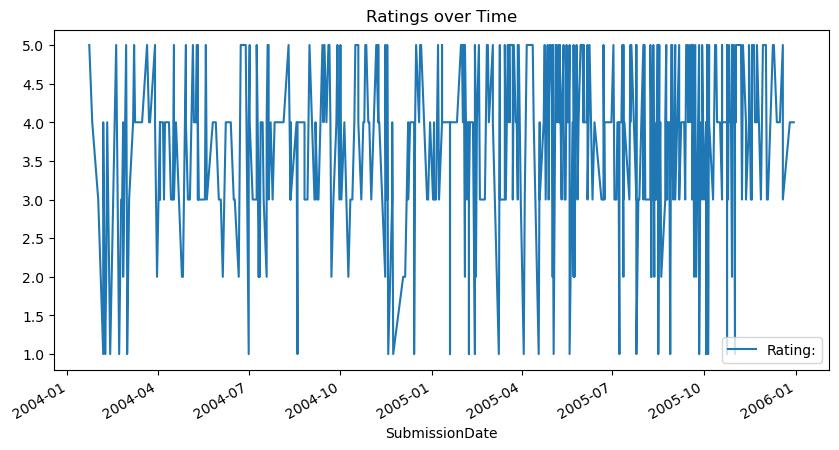

In [4]:
ax = df.plot(x='SubmissionDate', 
             y='Rating:', 
             title='Ratings over Time', figsize = (10,5));

In [5]:
df

,Movie ID:,Rating:,SubmissionDate
143,1596531,5,2004-01-23
446,1366860,4,2004-01-26
24,1181550,3,2004-02-01
101,2439493,1,2004-02-06
263,2413320,4,2004-02-06
...,...,...,...
229,1394012,5,2005-12-19
21,1245640,3,2005-12-19
3,30878,4,2005-12-26
186,14756,4,2005-12-27


In [6]:
# Using pandas.DataFrame.query() to select DataFrame Rows
start_date = '2004-01-01'
end_date   = '2004-12-30'
df1 = df.query('SubmissionDate>=@start_date and SubmissionDate<=@end_date')
print(df1)

     Movie ID:   Rating: SubmissionDate
143     1596531        5     2004-01-23
446     1366860        4     2004-01-26
24      1181550        3     2004-02-01
101     2439493        1     2004-02-06
263     2413320        4     2004-02-06
..          ...      ...            ...
455     1388284        5     2004-12-21
177     2283366        3     2004-12-27
17      1086807        3     2004-12-28
94      1245406        4     2004-12-30
267     2010770        4     2004-12-30

[199 rows x 3 columns]


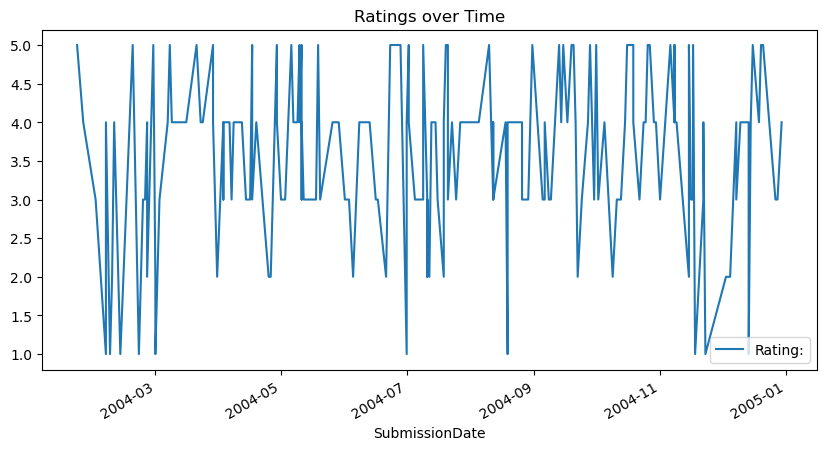

In [7]:
ax = df1.plot(x='SubmissionDate', 
             y='Rating:', 
             title='Ratings over Time', figsize = (10,5));

In [8]:
# Using pandas.DataFrame.query() to select DataFrame Rows
start_date = '2005-01-01'
end_date   = '2005-12-30'
df2 = df.query('SubmissionDate>=@start_date and SubmissionDate<=@end_date')
print(df2)

     Movie ID:   Rating: SubmissionDate
148     1777406        3     2005-01-02
256      828410        4     2005-01-03
105      231001        3     2005-01-03
492     1123959        3     2005-01-05
430     2078679        5     2005-01-07
..          ...      ...            ...
229     1394012        5     2005-12-19
21      1245640        3     2005-12-19
3         30878        4     2005-12-26
186       14756        4     2005-12-27
47      2647871        4     2005-12-30

[348 rows x 3 columns]


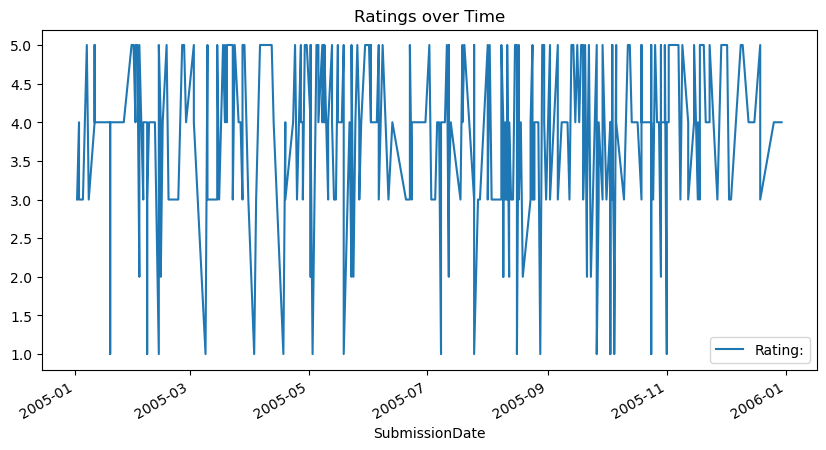

In [9]:
ax = df2.plot(x='SubmissionDate', 
             y='Rating:', 
             title='Ratings over Time', figsize = (10,5));

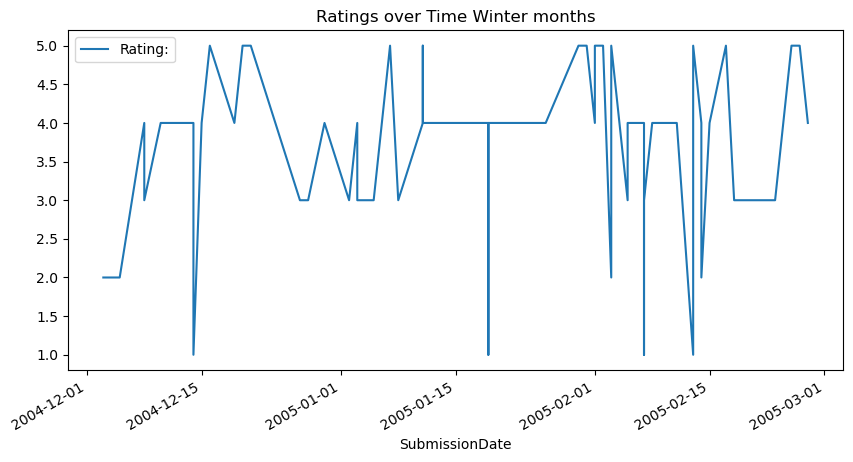

In [10]:
#WINTER SEASON MONTHS

# Using pandas.DataFrame.query() to select DataFrame Rows
start_date = '2004-12-01'
end_date   = '2005-2-28'
df_winter = df.query('SubmissionDate>=@start_date and SubmissionDate<=@end_date')
#print(df3)
ax = df_winter.plot(x='SubmissionDate', 
             y='Rating:', 
             title='Ratings over Time Winter months', figsize = (10,5));

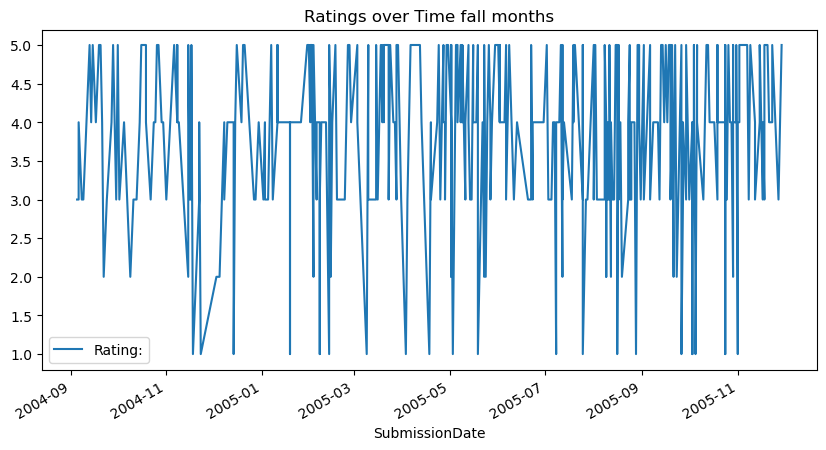

In [11]:
#Fall SEASON MONTHS

# Using pandas.DataFrame.query() to select DataFrame Rows
start_date = '2004-09-01'
end_date   = '2005-11-30'
df_fall = df.query('SubmissionDate>=@start_date and SubmissionDate<=@end_date')
#print(df3)
ax = df_fall.plot(x='SubmissionDate', 
             y='Rating:', 
             title='Ratings over Time fall months', figsize = (10,5));

In [13]:
#drop duplicate dates and display in order
new = df.sort_values('SubmissionDate').drop_duplicates('SubmissionDate')
new

,Movie ID:,Rating:,SubmissionDate
143,1596531,5,2004-01-23
446,1366860,4,2004-01-26
24,1181550,3,2004-02-01
101,2439493,1,2004-02-06
442,387418,1,2004-02-08
...,...,...,...
69,883478,4,2005-12-16
21,1245640,3,2005-12-19
3,30878,4,2005-12-26
186,14756,4,2005-12-27
